# Packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image

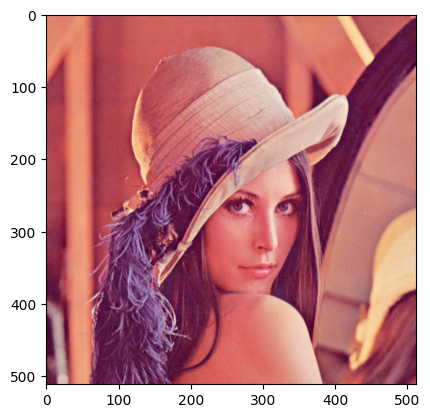

In [2]:
img = cv2.cvtColor(cv2.imread('images/Lenna.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# 2. Bilateral Filter

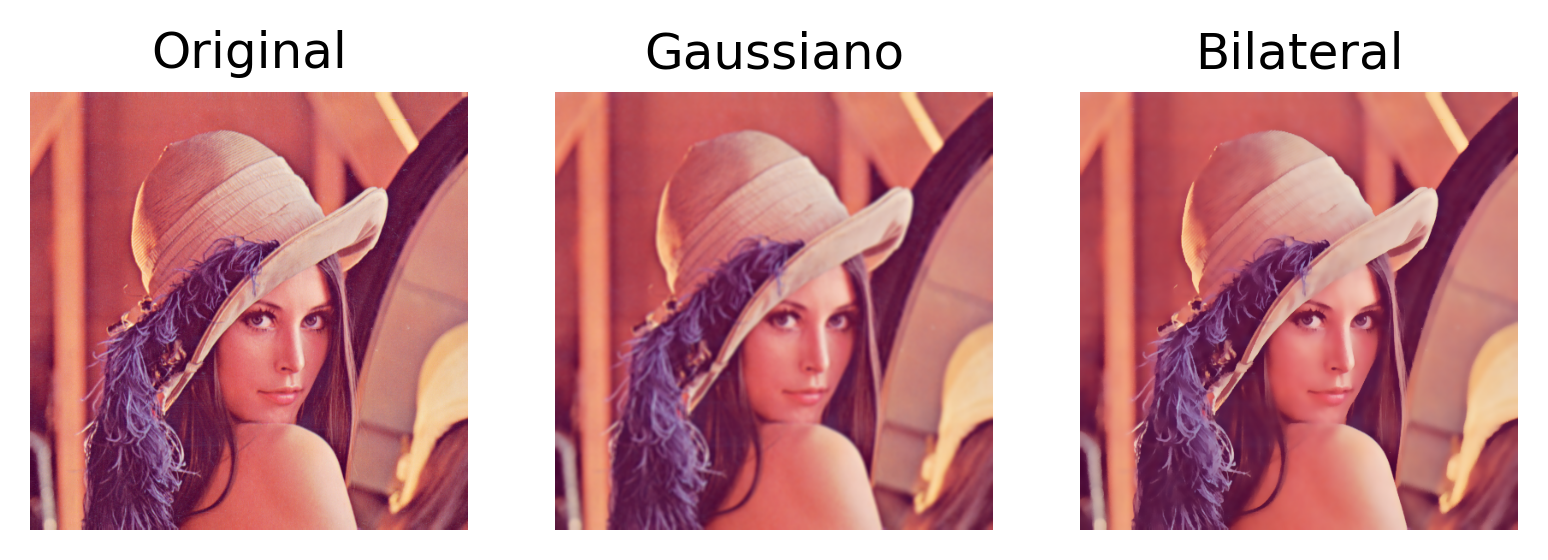

In [3]:
img_blur = cv2.GaussianBlur(img, (5, 5), 2, 2)

img_bilateral = cv2.bilateralFilter(img, 9, sigmaColor=50, sigmaSpace=50)

fig, ax = plt.subplots(nrows = 1, ncols = 3, dpi = 300)

# Images
ax[0].imshow(img)
ax[1].imshow(img_blur)
ax[2].imshow(img_bilateral)

ax[0].set_title('Original')
ax[0].axis('off')
ax[1].set_title('Gaussiano')
ax[1].axis('off')
ax[2].set_title('Bilateral')
ax[2].axis('off')

plt.show()

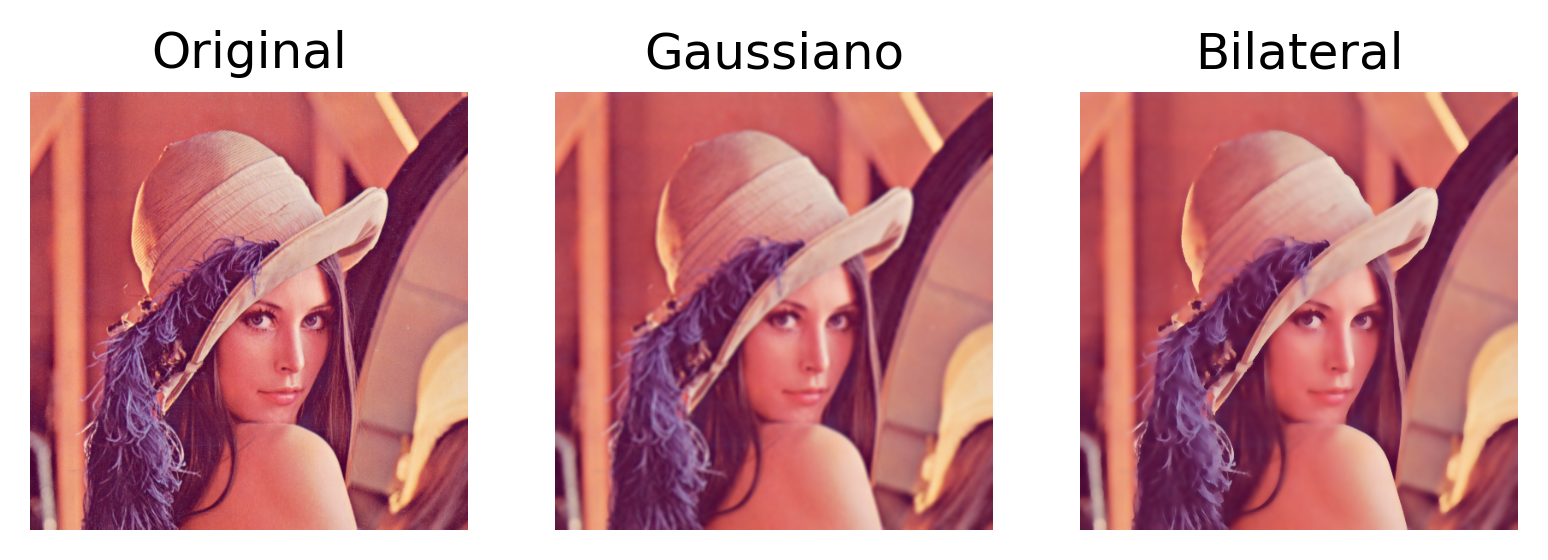

In [4]:
img_blur = cv2.GaussianBlur(img, (5, 5), 4, 4)

img_bilateral = cv2.bilateralFilter(img, 9, sigmaColor=100, sigmaSpace=100)

fig, ax = plt.subplots(nrows = 1, ncols = 3, dpi = 300)

# Imagens
ax[0].imshow(img)
ax[1].imshow(img_blur)
ax[2].imshow(img_bilateral)

ax[0].set_title('Original')
ax[0].axis('off')
ax[1].set_title('Gaussiano')
ax[1].axis('off')
ax[2].set_title('Bilateral')
ax[2].axis('off')

plt.show()

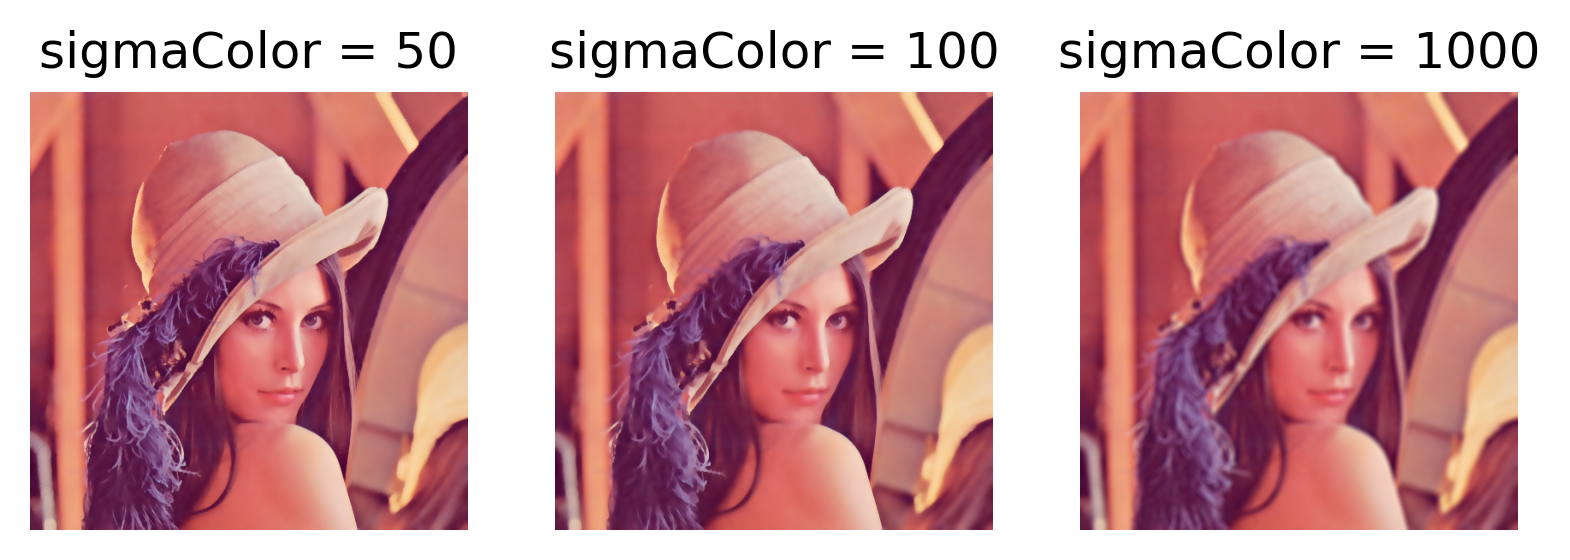

In [5]:
img_bilateral1 = cv2.bilateralFilter(img, 9, sigmaColor=50, sigmaSpace=50)
img_bilateral2 = cv2.bilateralFilter(img, 9, sigmaColor=100, sigmaSpace=50)
img_bilateral3 = cv2.bilateralFilter(img, 9, sigmaColor=1000, sigmaSpace=50)

fig, ax = plt.subplots(nrows = 1, ncols = 3, dpi = 300)

# Imagens
ax[0].imshow(img_bilateral1)
ax[1].imshow(img_bilateral2)
ax[2].imshow(img_bilateral3)

ax[0].set_title('sigmaColor = 50')
ax[0].axis('off')
ax[1].set_title('sigmaColor = 100')
ax[1].axis('off')
ax[2].set_title('sigmaColor = 1000')
ax[2].axis('off')

plt.show()

# 3. Image with Gaussian Noise

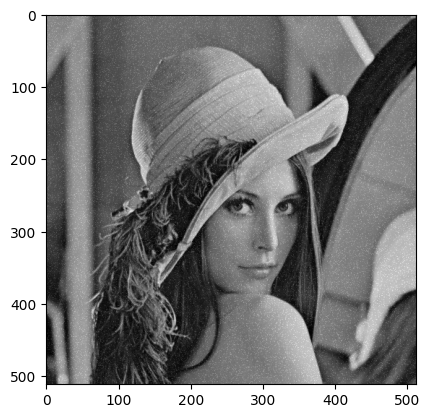

In [6]:
sigma_noise = 25

z_normal = 1.6

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img_gray = ((img_gray / 255) * (255 - sigma_noise * z_normal)).astype(np.uint8)

mask = np.random.randint(2, size = img_gray.shape)

noise = np.zeros(img_gray.shape, dtype=np.uint8)

cv2.randn(noise, 0, sigma_noise)  # média 0 e desvio padrão 25

noise = noise * (noise < (sigma_noise * z_normal))

noisy_img = np.where(mask, img_gray + noise, img_gray)

plt.imshow(noisy_img, cmap='gray')
plt.show()

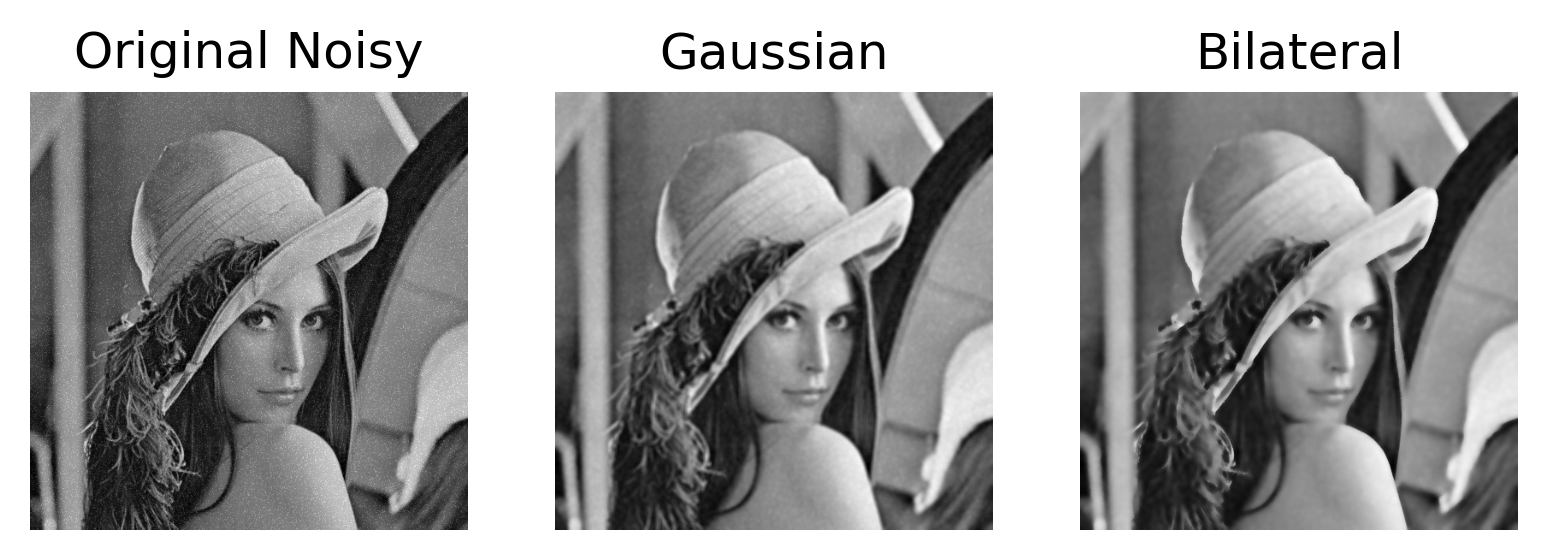

In [7]:
img_blur = cv2.GaussianBlur(noisy_img, (5, 5), 4)
img_bilateral = cv2.bilateralFilter(noisy_img, 9, sigmaColor=50, sigmaSpace=50)

fig, ax = plt.subplots(nrows = 1, ncols = 3, dpi = 300)

# Imagens
ax[0].imshow(noisy_img, cmap='gray')
ax[1].imshow(img_blur, cmap='gray')
ax[2].imshow(img_bilateral, cmap='gray')

ax[0].set_title('Original Noisy')
ax[0].axis('off')
ax[1].set_title('Gaussian')
ax[1].axis('off')
ax[2].set_title('Bilateral')
ax[2].axis('off')

plt.show()